<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (13)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithm: Simple Linear Regression</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to build a Simple Linear Regression model. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>.

<u>Dataset</u>

From moodle/ datasets, download the Advertising dataset and upload it to your Jupyter directory. The dataset has 4 attributes which are; TV, Newspaper, Radio and Sales.

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek13), load the NumPy, pandas and matplotlib libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (Advertising Dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [2]:
Adv = pd.read_csv("advertising.csv")

In [3]:
Adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type

In [4]:
Adv.keys() #Print the attributes

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
Adv.describe() #Data description

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
Adv.dtypes #Data Type

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

<u>Exploratory Data Analysis</u>

The following pairplot and the heatmap show that the variable "TV" seems to be most correlated with "Sales". So TV will be used as the feature variable.

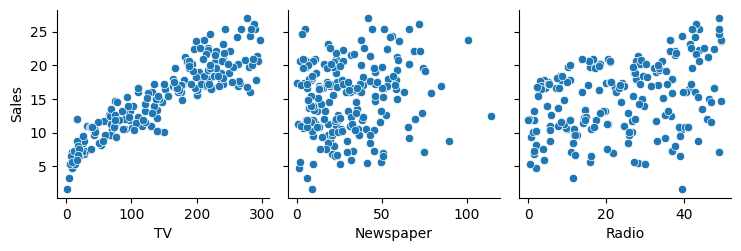

In [7]:
# Display how Sales are related with other variables using scatter plot.
import seaborn as sns
sns.pairplot(Adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', aspect=1, kind='scatter')
plt.show()

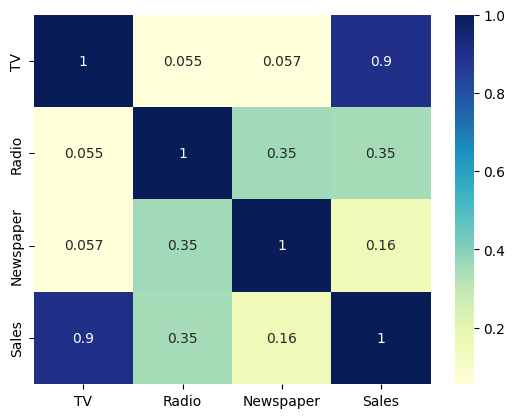

In [8]:
# Display the correlation between different variables.
sns.heatmap(Adv.corr(), cmap="YlGnBu", annot = True)
plt.show()

<u>Define the predictor and target attribute</u>

We will use all the Predictor attributes which we call <code>"x"</code> and the target attribute which we call <code>"y"</code>.

<i>Tv is represented as 0 and Sales as 1. In addition, the target and predictor attributes need to be reshaped to 1D since only one feature is used. </i>

In [9]:
x = Adv.iloc[:,0].values.reshape(-1,1)    # predictor attribute
y = Adv.iloc[:,-1].values.reshape(-1,1) # target attribute

In [10]:
#To view the value of x
Adv.iloc[:,:-1].values    # predictor attribute

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [11]:
#To view the value of y
Adv.iloc[:,-1].values        # target attribute

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

<u>Train/Test the data </u>

The dataset will be split into a test set and a train set. A 75% dataset is split for training and the remaining 25% for tests.

<b>Note:</b> <code>random_state=0</code>


- If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time.

- However, if you use a particular value for random_state(random_state = 0 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

In [12]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)

<u>Build the Machine learning Model</u>

Simple Linear Regression will be imporetd using Scikit Learn Library.

In [13]:
# import the Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

<u>Initialize the model</u>

In this step, the model will be initialized.

In [14]:
#initialize the linear regression model
regressor=LinearRegression()
regressor

LinearRegression()

<u>Fitting the Model</u>

In this step, the training data will be fitted into the model x_train, y_train is the training data.

In [15]:
#fit the Linear Regression Model
regressor.fit(x_train,y_train)

LinearRegression()

<u>Model Predicttion</u>

In [16]:
#result
y_pred=regressor.predict(x_test)
y_pred

array([[10.90227673],
       [ 9.85532218],
       [12.05828903],
       [22.92589531],
       [16.40969385],
       [10.19340125],
       [ 7.60327934],
       [20.22126274],
       [ 8.42666546],
       [17.90378523],
       [21.37727504],
       [11.88379661],
       [15.66810105],
       [17.36940218],
       [11.29488468],
       [13.68324973],
       [21.61174924],
       [ 7.16704828],
       [11.20218558],
       [18.76534158],
       [22.81138465],
       [14.77928027],
       [16.67688538],
       [14.31033188],
       [10.04617327],
       [13.84138349],
       [16.15886099],
       [18.30729896],
       [19.34334773],
       [ 8.49755301],
       [10.82593629],
       [17.97467278],
       [22.43513536],
       [20.30850895],
       [ 7.84865931],
       [ 8.14856816],
       [10.37879945],
       [16.98770001],
       [10.85865362],
       [ 8.49210012],
       [ 9.14099382],
       [ 8.84653786],
       [14.92105536],
       [18.55813182],
       [18.87439934],
       [12

<u>Results Visualization</u>

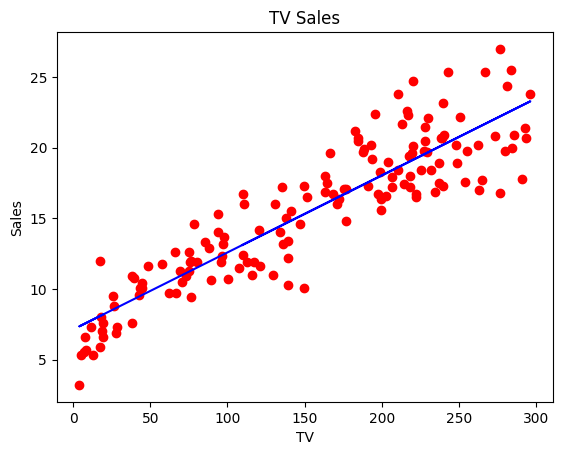

In [17]:
# Visualizing the Result (Training_Set)
plt.scatter(x_train,y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color= 'blue' )
plt.title('TV Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

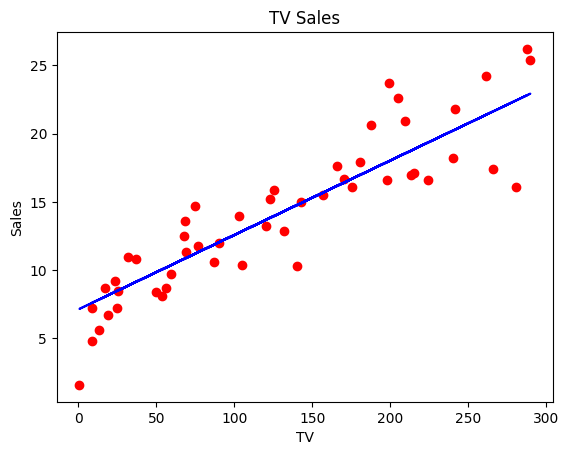

In [18]:
# Visualizing the Result (Test Set)
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test, regressor.predict(x_test), color='blue')
plt.title("TV Sales")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show

<u>Print intercept and Slope</u>

A linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

The following will print the intercept and slope calculated by the linear regression algorithm for the dataset.

In [19]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[7.12887806]
[[0.05452888]]


<u>Model Evaluation</u>

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.949384253020705
Mean Squared Error: 6.010070421507887
Root Mean Squared Error: 2.451544497150294


In [23]:

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-x_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

R2 score: 0.8053611644334993
Adjusted R2 score: 0.8013061886925305
